# Recommandation Netflix user

We would like you to create some movie recommendations for our very special user, Monica Villarreal. Can you please recommend 5 other movies to her? We would like Monica to watch more movies on our website so that she remains a loyal customer. 

Similar users to Monica Villarreal : {'Dillon Gay': np.float64(0.9980581358372058), 'Justin Rocha': np.float64(0.9972861568891727), 'April Miller': np.float64(0.9959895258010609), 'Brendan Chang': np.float64(0.993688195729231), 'Jeremiah Wood': np.float64(0.9930289852417019), 'Chad Wheeler': np.float64(0.991316672465359), 'Steven Roach': np.float64(0.9909006417637627), 'Kaitlyn Wolf': np.float64(0.988919386268908), 'Colleen Long': np.float64(0.9880235200593538), 'Tina Aguirre': np.float64(0.9860528618264147)}
Number of similar users found: 10


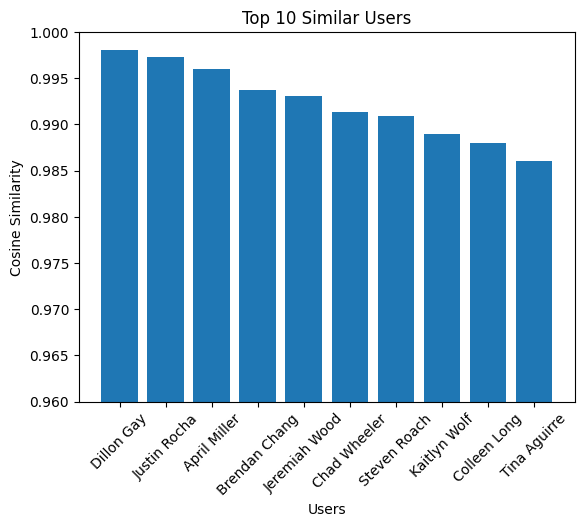

In [57]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv("Netmovies_ratings_db.csv")

user_item_matrix = data.pivot_table(
    index="userName", 
    columns="title", 
    values="rating"
)
user="Monica Villarreal"

def get_similar_users(target_user,n=5):
    if target_user not in user_item_matrix.index:
        return f"User '{target_user}' not found."

    similarities = {}
    for other_user in user_item_matrix.index:
        if other_user == target_user:
            continue
        
        common_movies = user_item_matrix.loc[target_user].dropna().index.intersection(
                        user_item_matrix.loc[other_user].dropna().index)
        
        if len(common_movies) <4:
            continue

        v1 = user_item_matrix.loc[target_user, common_movies].to_numpy()
        v2 = user_item_matrix.loc[other_user, common_movies].to_numpy()

        numerator = np.sum(v1 * v2)
        denominator = np.sqrt(np.sum(v1**2)) * np.sqrt(np.sum(v2**2))
        
        if denominator == 0:
            sim = np.nan
        else:
            sim = numerator / denominator

        similarities[other_user] = sim

    # Trier par similarité décroissante
    similar_users = sorted(similarities, key=similarities.get,reverse=True)[:n]
    return {u: similarities[u] for u in similar_users}
    

similar_users = get_similar_users(user,n=10)

print("Similar users to", user, ":", similar_users)
print("Number of similar users found:", len(similar_users))

plt.bar(similar_users.keys(), similar_users.values(),)
plt.xlabel('Users')
plt.ylabel('Cosine Similarity')
plt.title('Top 10 Similar Users')
plt.xticks(rotation=45)
plt.ylim(0.96, 1)
plt.show()

With the n most close user we can select the recommended films. 

We will chose the five more viewed films by the closet person

{'Ariel': 16.0, 'Metropolis': 11.0, 'Three Colors: Red': 23.5, 'The Lord of the Rings: The Return of the King': 2.5, 'Back to the Future Part II': 18.5, '20,000 Leagues Under the Sea': 12.0, 'Star Trek: Generations': 10.0, 'Syriana': 15.0, 'A River Runs Through It': 30.0, 'Bang, Boom, Bang': 19.5, 'Batman Returns': 25.0, 'Cube': 11.5, 'Popular Music': 12.5, 'Klute': 7.0, 'Love Actually': 14.0, 'Once Were Warriors': 33.5, 'The Last Samurai': 7.0, 'Harry Potter and the Prisoner of Azkaban': 9.0, 'Monty Python and the Holy Grail': 8.0, 'Kolya': 14.5, 'Sleepless in Seattle': 38.5, 'The Hidden Fortress': 6.0, 'Point Break': 22.0, 'The Third Man': 13.0, 'The Talented Mr. Ripley': 35.0, 'The Good Shepherd': 21.5, 'Hollywoodland': 13.5, 'TMNT': 3.5, 'The Dreamers': 17.0, 'Y Tu Mamá También': 10.5, 'The Cave of the Yellow Dog': 16.0, 'Get Carter': 12.0, 'Changing Lanes': 7.0, 'Funeral Parade of Roses': 3.5, 'Fever Pitch': 16.5, 'King Kong vs. Godzilla': 7.0, 'Mothra vs. Godzilla': 31.0, 'All th

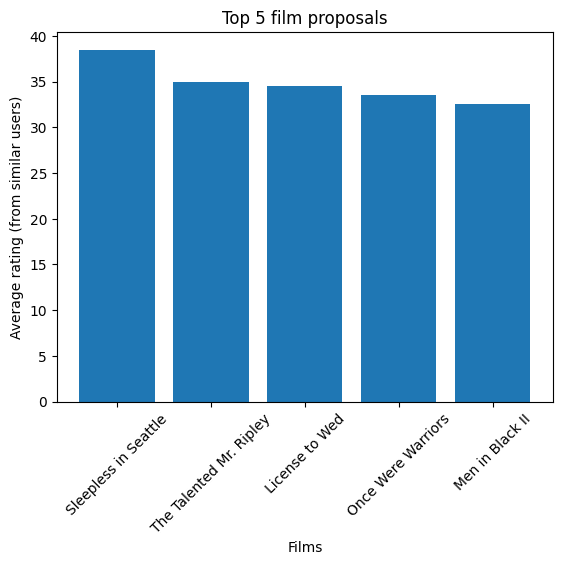

In [61]:
def get_proposed_films(user):
    """
    Get a list of films rated by the user.
    
    """
    films_user=data[data['userName']==user]['title'].tolist()
    film_ratings = {}
        
    for other in similar_users:
        user_films = data[data['userName'] == other][['title', 'rating']]
        for _, row in user_films.iterrows():
            film = row['title']
            rating = row['rating']
            if film not in films_user:  
                if film not in film_ratings:
                    film_ratings[film] = rating
                else:
                    film_ratings[film]= film_ratings[film]+rating
    print(film_ratings)
    
    
    sorted_films = sorted(film_ratings.items(), key=lambda x: x[1], reverse=True)
    return sorted_films

film_proposals = get_proposed_films(user)[:5]
print("Recommended films:")
for film in film_proposals:
    print(film)


films = [f for f, s in film_proposals]
scores = [s for f, s in film_proposals]

plt.bar(films, scores)
plt.xlabel('Films')
plt.ylabel('Average rating (from similar users)')
plt.title('Top 5 film proposals')
plt.xticks(rotation=45)
plt.show()